# Tutorial 2: Quantum Gates

##### After going through this 1 hour tutorial you will:

- understand pyQuil's wavefunction functionality
- be able to visualize quantum states on the Bloch sphere
- understand quantum gates on the Bloch sphere
- be able to use pyQuil to create shallow circuits
- know how to use quantum gate identities to simplify circuits

First we need to install [QuTiP](http://qutip.org/) which is a Python toolbox for quantum physicists. We will use it to plot quantum states on the Bloch sphere. If you haven't work with or heard of QuTiP yet then you should definitely check it out (not now though).

In [ ]:
!pip install qutip

Next we need to make sure that we set up our API key & user ID in order to be able to use Rigetti's servers.

In [ ]:
import os

API_KEY = 'YOUR API KEY GOES HERE'
USER_ID = 'YOUR USER ID GOES HERE'

PYQUIL_CONFIG = f"""
[Rigetti Forest]
url: https://api.rigetti.com/qvm
key: {API_KEY}
user_id: {USER_ID}
"""

with open(os.path.expanduser('~/.pyquil_config'), 'w') as f:
    f.write(PYQUIL_CONFIG)

***
## 1. The Bloch sphere

In the [standard quantum computing literature](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwifzcXS743cAhXs6YMKHX9WCXkQFggqMAA&url=http%3A%2F%2Fwww-reynal.ensea.fr%2Fdocs%2Fiq%2FQC10th.pdf&usg=AOvVaw2C4NgLeXUf1P_DLxSk85_e) we usually write a single qubit as:

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\ket{\psi} = e^{i\gamma} \big( \, \alpha \ket{0} + \beta \ket{1}\,\big)$$

We know that the probability of measuring the $\ket{0}$ state is given by the absolute value of its amplitude squared:

$$|e^{i\gamma}\alpha|^2 = e^{i\gamma}\alpha e^{-i\gamma}\alpha^\dagger = e^{i\gamma - i\gamma} \alpha \alpha^\dagger = \alpha \alpha^\dagger$$

This leads to the important observation that the global phase of $e^{i\gamma}$ has no impact on the final probability and thus *global phases can always be ignored since they are immeasurable quantities*.

However, in order to visualize single-qubit states we need to express the qubit amplitudes in the following form:

$$\ket{\psi} = \cos(\frac{\theta}{2}) \ket{0} + e^{i\phi}\sin(\frac{\theta}{2}) \ket{1}$$
where
$$0 \leq \theta \leq \pi$$ and $$0 \leq \phi < 2\pi$$.

From this expression we can obtain the three Cartesian coordinates:

$$x = \sin(\theta)\cos(\phi)$$
$$y = \sin(\theta)\sin(\phi)$$
$$z = \cos(\theta)$$

which can be plotted on the three-dimensional unit 2-sphere, also called Bloch sphere which looks like this:

In [ ]:
from qutip import Bloch

# Initialize an empty Bloch sphere
bloch_sphere = Bloch()
bloch_sphere.show()

#### Exercise 1.0: 
If you haven't worked with the Bloch sphere before, read about it briefly (!) on [Wikipedia](https://en.wikipedia.org/wiki/Bloch_sphere) and read page 15 in [Nielsen & Chuang](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwifzcXS743cAhXs6YMKHX9WCXkQFggqMAA&url=http%3A%2F%2Fwww-reynal.ensea.fr%2Fdocs%2Fiq%2FQC10th.pdf&usg=AOvVaw2C4NgLeXUf1P_DLxSk85_e). What does it mean if a quantum state vector lies on the equator of the sphere?

Answer:

Here we define two useful functions related to the Bloch sphere that we will need later on. The first one eliminates the global phase and computes $x, y, z$ from $\alpha$ and $\beta$. The second function simply plots a given amplitude vector on the Bloch sphere using the QuTiP library. 

In [ ]:
import cmath

def get_vector(alpha, beta):
    """
    Function to compute 3D Cartesian coordinates
    from 2D qubit vector.
    """

    # get phases
    angle_alpha = cmath.phase(alpha)
    angle_beta = cmath.phase(beta)

    if (angle_beta < 0 and angle_alpha < angle_beta) or (angle_beta > 0 and angle_alpha > angle_beta):
            denominator = cmath.exp(1j*angle_beta)
    else:
            denominator = cmath.exp(1j*angle_alpha)

    # eliminate global phase
    alpha_new = alpha/denominator
    beta_new = beta/denominator

    # special case to avoid division by zero
    if abs(alpha) == 0 or abs(beta) == 0:
        if alpha == 0:
            return [0,0,-1]
        else:
            return [0,0,1]
    else:
        # compute theta and phi from alpha and beta
        theta = 2*cmath.acos(alpha_new)
        phi = -1j*cmath.log(beta_new/cmath.sin(theta/2))

        # compute the Cartesian coordinates
        x = cmath.sin(theta)*cmath.cos(phi)
        y = cmath.sin(theta)*cmath.sin(phi)
        z = cmath.cos(theta)

    return [x.real,y.real,z.real]

def plot_quantum_state(sphere, amplitudes):
    """
    Thin function to abstract the plotting on the Bloch sphere.
    """
    bloch_sphere = Bloch()
    vec = get_vector(amplitudes[0], amplitudes[1])
    bloch_sphere.add_vectors(vec)
    bloch_sphere.show()
    bloch_sphere.clear()

***
## 2. pyQuil's wavefunction

Rigetti initializes all their qubits in the $\ket{0}$ state. Let's verify this by running a simple pyQuil program and visualizing the resulting quantum state on the Bloch sphere.

#### Exercise 2.0: 
Read the puQuil docs and learn how to obtain the wavefunction and its amplitudes to visualize the initial qubit state on the Bloch sphere.

In [ ]:
from pyquil.api import QVMConnection
from pyquil.quil import Program

# initialize a QVMConnection with Rigetti's server
qvm = QVMConnection()

# initialize a pyQuil program that measures the initial qubit state
p = Program()
p.measure(0, 0)

# TODO: find out how to get the resulting wavefunction + amplitudes after running the program in the QVM
wavefunction =
amplitudes =

# now we can call our custom function to plot the quantum state
plot_quantum_state(bloch_sphere, amplitudes)

pyQuil's Wavefunction has a lot of very helpful functionalities like obtaining probabilities from amplitudes, plotting as well as pretty printing them. 

#### Exercise 2.1:
Explore pyQuil's wavefunction functionalities. Try them out now!

In [ ]:
# TODO: Try getting the probabilities from a wavefunction object and plot & pretty print the result!


***
## 3. The Hadamard gate

In the previous tutorial you've already familiarized yourself with a really important quantum gate: the Hadamard gate. In Dirac notation the H gate corresponds to the matrix given by:

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}$$

The Hadamard is an essential ingredient to create quantum superposition states. In the following exercises you will further explore it's use cases and intricacies.

#### Exercise 3.0:
Import and apply the Hadamard gate one time and observe how the plot of the probability distribution changes! What do you observe?

In [ ]:
p = Program()
# apply the Hadamard gate to qubit 0 once

# TODO: get the wavefunction from the QVM 
# and plot the probability distribution

#### Exercise 3.1:
In three different experiments, apply the Hadamard gate two, three, and four times in sequence and observe how the probability distribution changes! What do you observe?

In [ ]:
p = Program()
# TODO: apply the Hadamard gate multiple times

# TODO: get the wavefunction from the QVM 
# and plot the probability distribution

***
## 4. Pauli gates on the Bloch sphere

#### Exercise 4.0:
Explore the action of the Pauli gates (Identity, $X$, $Y$, $Z$) on the Bloch sphere. <a title="Try using a H gate first to move the Bloch vector onto the equator and then apply the X, Y or Z gate to observe the rotation.">Hint.</a>

In [ ]:
# TODO: import the Pauli gates (Identity, X, Y, Z).

p = Program()

# HINT: this is how we instantiate an X (NOT) gate on qubit 0
p.inst(X(0))

# TODO: try I, X, Y, Z on different initial quantum states!

# TODO: get amplitudes for plotting.
amplitudes = 

plot_quantum_state(bloch_sphere, amplitudes)

#### Exercise 4.1:
How many degrees around which axis do the Pauli gates rotate the Bloch vector? Make sure to also try other initial states (e.g. Bloch vector on $x$, $-x$, $y$ or $-y$ axis)!

Answer:

#### Exercise 4.2:
There is many more elementary quantum gates than just Pauli gates! Try out the $T$ and $S$ gates and find out which rotations they correspond to. You might want to quickly read up on them in [Nielsen & Chuang](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwifzcXS743cAhXs6YMKHX9WCXkQFggqMAA&url=http%3A%2F%2Fwww-reynal.ensea.fr%2Fdocs%2Fiq%2FQC10th.pdf&usg=AOvVaw2C4NgLeXUf1P_DLxSk85_e).

In [ ]:
# TODO: import the T and S gate

p = Program()

# TODO: try T and S on different initial quantum states!

# TODO: get amplitudes for plotting.
amplitudes = 

plot_quantum_state(bloch_sphere, amplitudes)

#### Exercise 4.3:
What rotations on the Bloch sphere do the T and S gate correspond to?

Answer:

#### Exercise 4.4:
pyQuil has many different ways of defining a quantum program. Read the docs and try it below (print the final programs to understand the effect):

In [ ]:
# TODO: Try out different possibilities of chaining instructions
p = Program()

# try putting multiple gates into a single .inst() call

# chain multiple .inst() call after each other and add a final MEASURE or .measure statement

# try to mix the two possibilities above

# define three programs and then add them together and print it. What do you observe?

#### Exercise 4.5:
Use the last program from the previous exercise and try out calling the `.pop()` function. Print the program again. What do you observe?

In [ ]:
# TODO: Use .pop() on the last program from Ex. 4.4

#### Exercise 4.6:
pyQuil comes with a lot of already implemented quantum gates. In this exercise it is your goal to manually implement your own single qubit gate. Try to define the following gate manually:
$U =  \begin{bmatrix}
e^{i\frac{2}{3}\pi} & 0 \\
0 & e^{-i\frac{2}{3}\pi}
\end{bmatrix}$

In [ ]:
# TODO: Implement custom single-qubit rotation with pyQuil

***
## 5. Quantum gate identities

Current quantum computers only allow shallow depth circuits since the qubits decohere too quickly. Thus, it is extremely important to keep your circuits small! In this section you will use pen & paper to learn how to manually simplify quantum circuits.

By the way, there is a lot of people (including Rigetti staff) working on automating this task. They are working on developing more efficient and better **quantum compiler**.

In [2]:
# Mark needs TODO: some examples for circuit identities & talk about hermitian matrices

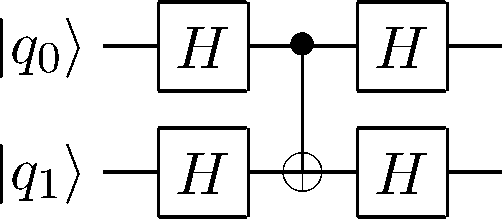

#### Pen & Paper Exercise 5.0
Go through the math of the quantum circuit shown above by explicitly multiplying the matrices. What does this circuit reduce to? <a title="You have to take the tensor product H x H (numpy.kron) in order to get a 4x4 matrix.">Hint.</a>

#### Pen & Paper Exercise 5.1
Consider the quantum circuit below. Use [this paper](https://arxiv.org/pdf/quant-ph/0307111.pdf) and other sources to simplify and condense the quantum circuit as much as possible.

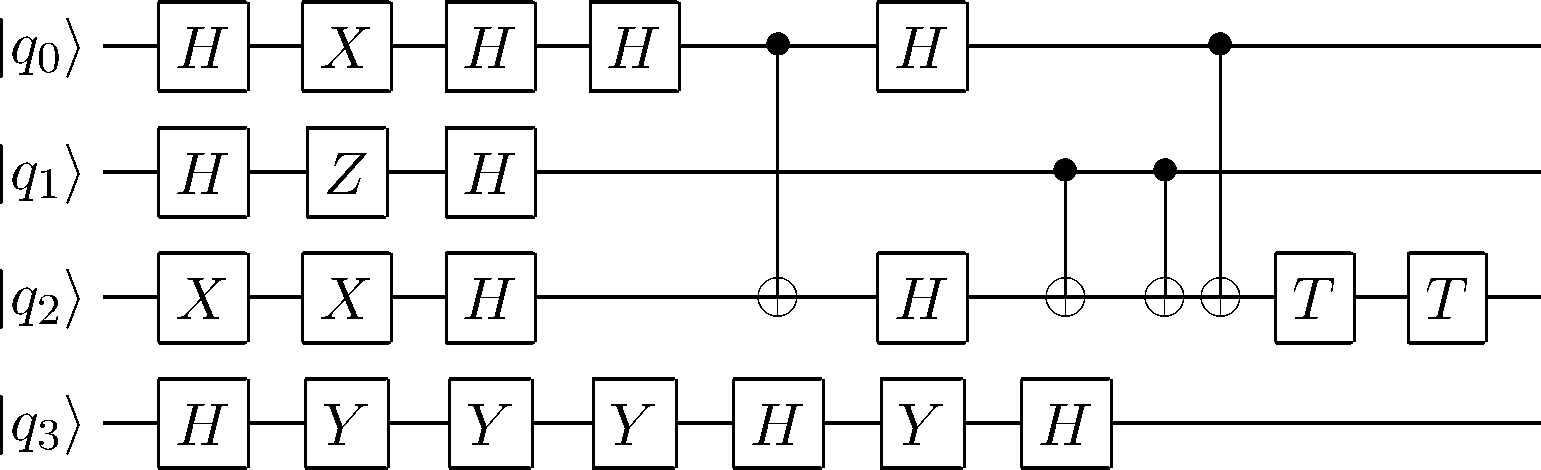

***
## 6. Bonus exercises

#### Bonus Exercise 6.0:
How would you describe the rotation of the Hadamard gate on the Bloch sphere? How many degrees around which axis? Make sure to not just check how it acts on the $\ket{0}$ or $\ket{1}$ state! Try for example to prepare the state $$\ket{\psi} = \frac{1}{\sqrt{2}}\ket{0} + \frac{i}{\sqrt{2}}\ket{1}$$ (y-axis on Bloch sphere) and then act the H gate on it.

Answer:

#### Bonus Exercise 6.1:
Read the pyQuil docs and learn about parametric gates and multi-qubit gates.

- Try to manually create a Toffoli gate by using `np.kron()`.
- Try to manually create a parametrized controlled U gate with:
$U =  \begin{bmatrix}
1 & 0 \\
0 & e^{i\phi}
\end{bmatrix}$

In [ ]:
# TODO: Manually create a Toffoli and a parametric controlled U gate

#### Bonus Exercise 6.2:


In [ ]:
# Mark needs TODO: Rotate the Bloch vector to the specified location